In [1]:
from scipy.optimize import linprog

In [ ]:
#linprog permet de résoudre un problème linéaire
#sous la forme :
#
#           min c'*x
#       tel que A_ub*x <= b_ub
#               A_eq*x  = b_eq
#               l <= x <= u
#

In [29]:
#Exemple du slide 7 du cours 2-Formulations

#Objectif
c    = [2,4]

#Contraintes d'inégalités
A_ub = [[-1,-1]]  #remarquez la transformation
b_ub = [-3]       # de x1+x2 >= 3 en -x1-x2 <= -3

#Contraintes d'égalités
A_eq = [[3,2]]
b_eq = [14]

#Bornes
bounds_x1 = [0,None]
bounds_x2 = [None,None]

#Résolution
model = linprog(c=c,A_ub=A_ub,b_ub=b_ub,A_eq=A_eq,b_eq=b_eq,bounds=[bounds_x1,bounds_x2])
x = model.x
print(f"A l'optimum, objectif={model.fun}")
print(f"La valeur optimale des variables est x={x}")

A l'optimum, objectif=-4.0
La valeur optimale des variables est x=[ 8. -5.]


La valeur optimale de a est a=1.1764705882352937 et b=-0.11764705882352362


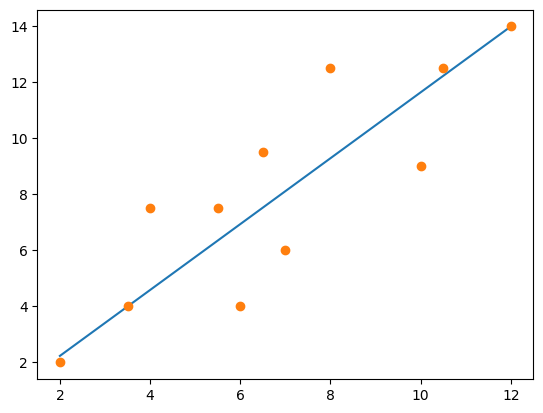

In [32]:
#Exemple du slide 17 du cours 2-Formulations

import matplotlib.pyplot as plt

#Données
x = [2,3.5,4,5.5,6,6.5,7,8,10,10.5,12]
y = [2,4,7.5,7.5,4,9.5,6,12.5,9,12.5,14]

n = len(x)

#Il faut réfléchir à la forme du vecteur de variables
#Ici, on propose qu'il soit : [a,b,t1,...,tn]
#Il y a donc n+2 variables

#Objectif
c    = [0,0]+[1]*n

#Contraintes d'inégalités : il y en a 2*n
A_ub = [[0] * (n+2) for _ in range(2*n)] #Initialisation d'une matrice de taille (2*n)*(n+2)
b_ub = [0]*(2*n) #Initialisation d'un vecteur de taille (2*n)
for i in range(n):
  A_ub[2*i][0]   = x[i]
  A_ub[2*i][1]   = 1
  A_ub[2*i][2+i] = -1
  b_ub[2*i]      = y[i]

  A_ub[2*i+1][0]   = -x[i]
  A_ub[2*i+1][1]   = -1
  A_ub[2*i+1][2+i] = -1
  b_ub[2*i+1]      = -y[i]

bounds = [[None,None] for _ in range(n+2)] #Pas de bornes pour les n+1 variables

model = linprog(c=c,A_ub=A_ub,b_ub=b_ub,bounds=bounds)
a, b  = model.x[0], model.x[1]
print(f"La valeur optimale de a est a={a} et b={b}")

absc = [2,12]
ordo = [a * x + b for x in absc]
plt.plot(absc,ordo) # Tracé de la droite
plt.plot(x,y,'o')   # Tracé des points